In [4]:
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
from scipy.stats import entropy
import torch
from torch.utils.data import DataLoader, TensorDataset


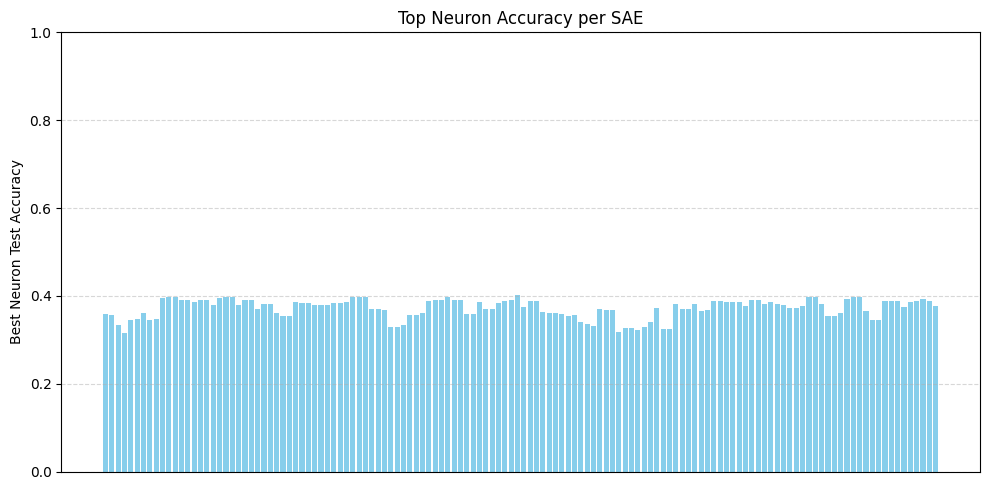

In [13]:
pkl_path = "all_results.pkl"
with open(pkl_path, "rb") as f:
    all_results = pickle.load(f)

best_accuracies = {
    sae_name: results["summary"]["top_neuron_accuracy"]
    for sae_name, results in all_results.items()
}

# Plot
plt.figure(figsize=(10, 5))
plt.bar(best_accuracies.keys(), best_accuracies.values(), color="skyblue")
plt.ylabel("Best Neuron Test Accuracy")
plt.title("Top Neuron Accuracy per SAE")
plt.ylim(0, 1)
plt.xticks([])  # Remove x-axis labels
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


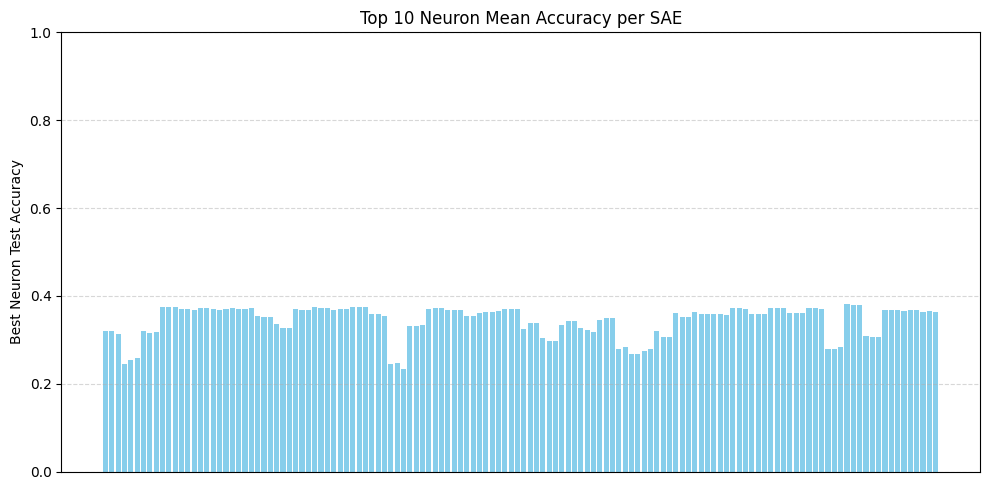

In [14]:
pkl_path = "all_results.pkl"
with open(pkl_path, "rb") as f:
    all_results = pickle.load(f)

best_accuracies = {
    sae_name: results["summary"]["top_10_mean"]
    for sae_name, results in all_results.items()
}

# Plot
plt.figure(figsize=(10, 5))
plt.bar(best_accuracies.keys(), best_accuracies.values(), color="skyblue")
plt.ylabel("Best Neuron Test Accuracy")
plt.title("Top 10 Neuron Mean Accuracy per SAE")
plt.ylim(0, 1)
plt.xticks([])  # Remove x-axis labels
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

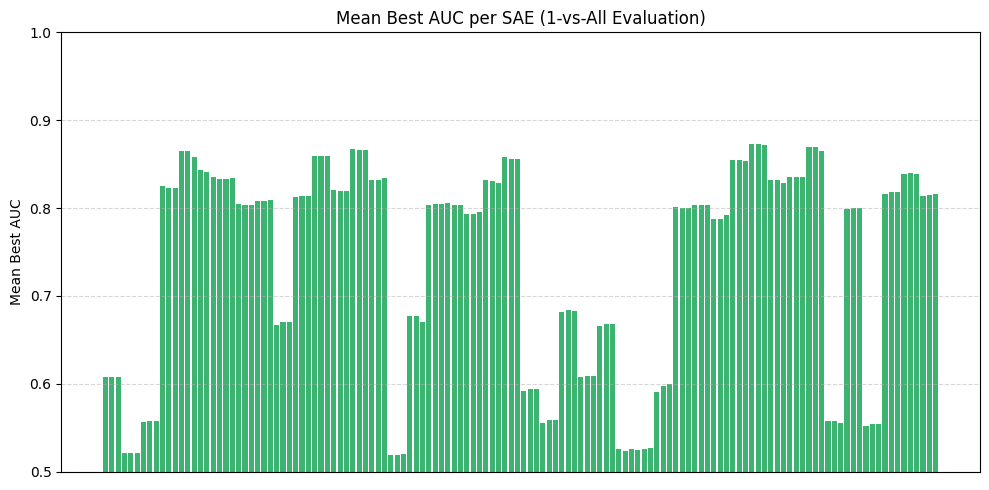

In [16]:

with open("all_results_new.pkl", "rb") as f:
    all_results = pickle.load(f)

mean_aucs = {
    sae_name: results["sae_summary"]["mean_best_auc"]
    for sae_name, results in all_results.items()
}

# Plot
plt.figure(figsize=(10, 5))
plt.bar(mean_aucs.keys(), mean_aucs.values(), color="mediumseagreen")
plt.ylabel("Mean Best AUC")
plt.title("Mean Best AUC per SAE (1-vs-All Evaluation)")
plt.ylim(0.5, 1.0)
plt.xticks([])
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
with open("all_results.pkl", "rb") as f:
    all_results = pickle.load(f)

# Extract mean_best_auc from each SAE's summary
mean_aucs = {
    sae_name: results["sae_summary"]["mean_best_auc"]
    for sae_name, results in all_results.items()
}

# Plot
plt.figure(figsize=(10, 5))
plt.bar(mean_aucs.keys(), mean_aucs.values(), color="mediumseagreen")
plt.ylabel("Mean Best AUC")
plt.title("Mean Best AUC per SAE (1-vs-All Evaluation)")
plt.ylim(0.5, 1.0)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


In [40]:
(auc_matrix > 0.95).sum(axis=1)

neuron_idx
0      0
1      1
2      0
3      1
4      1
      ..
251    0
252    0
253    0
254    0
255    1
Length: 256, dtype: int64

In [2]:
with open("all_results_new.pkl", "rb") as f:
    all_results = pickle.load(f)

pure_digit_coverage = {}

for sae_name, results in all_results.items():
    auc_matrix = results["auc_matrix"]
    neuron_df = results["per_neuron_df"]
    
    count_per_neuron = (auc_matrix > 0.95).sum(axis=1)
    
    pure_neurons = count_per_neuron[count_per_neuron == 1].index
    
    digits_represented = neuron_df.loc[pure_neurons, "best_digit"]
    
    digit_counts = digits_represented.value_counts().sort_index()
    
    pure_digit_coverage[sae_name] = {
        "n_digits_represented": digit_counts.count(),
        "digit_counts": digit_counts.to_dict()
    }

for sae, info in pure_digit_coverage.items():
    print(f"\n{sae}:")
    print(f"  Unique digits with ≥1 pure neuron: {info['n_digits_represented']}")
    print(f"  Digit breakdown: {info['digit_counts']}")




reanim_topk_sae_256_25_best_loss:
  Unique digits with ≥1 pure neuron: 6
  Digit breakdown: {0: 2, 1: 3, 4: 1, 5: 1, 6: 3, 9: 1}

reanim_topk_sae_256_25_best_both:
  Unique digits with ≥1 pure neuron: 7
  Digit breakdown: {0: 2, 1: 3, 2: 1, 4: 2, 5: 1, 6: 3, 9: 1}

reanim_topk_sae_256_25_best_dead10:
  Unique digits with ≥1 pure neuron: 6
  Digit breakdown: {0: 1, 1: 2, 2: 1, 4: 2, 5: 1, 6: 1}

topk_sae_256_5_best_loss:
  Unique digits with ≥1 pure neuron: 3
  Digit breakdown: {1: 1, 6: 1, 7: 1}

topk_sae_256_5_best_both:
  Unique digits with ≥1 pure neuron: 4
  Digit breakdown: {0: 1, 1: 1, 3: 1, 7: 1}

topk_sae_256_5_best_dead10:
  Unique digits with ≥1 pure neuron: 4
  Digit breakdown: {0: 1, 1: 1, 3: 1, 7: 1}

reanim_topk_sae_512_25_best_loss:
  Unique digits with ≥1 pure neuron: 5
  Digit breakdown: {0: 1, 1: 2, 3: 1, 4: 1, 7: 4}

reanim_topk_sae_512_25_best_both:
  Unique digits with ≥1 pure neuron: 5
  Digit breakdown: {1: 1, 3: 2, 4: 1, 6: 1, 7: 4}

reanim_topk_sae_512_25_best

In [6]:
all_results

{'reanim_topk_sae_256_25_best_loss': {'auc_matrix': digit              0         1         2         3         4         5  \
  neuron_idx                                                               
  0           0.500000  0.500000  0.500000  0.500000  0.500000  0.500000   
  1           0.692268  0.605488  0.600145  0.598554  0.623735  0.523261   
  2           0.500000  0.500000  0.500000  0.500000  0.500000  0.500000   
  3           0.500058  0.499536  0.500058  0.499942  0.500058  0.500057   
  4           0.502196  0.501420  0.501613  0.502203  0.503731  0.502177   
  ...              ...       ...       ...       ...       ...       ...   
  251         0.500347  0.500352  0.500347  0.500222  0.499654  0.500344   
  252         0.500636  0.500645  0.500636  0.500638  0.500635  0.506293   
  253         0.498284  0.507497  0.501787  0.503383  0.502292  0.502236   
  254         0.509559  0.474118  0.642519  0.620991  0.544452  0.567790   
  255         0.500404  0.499888  0.50

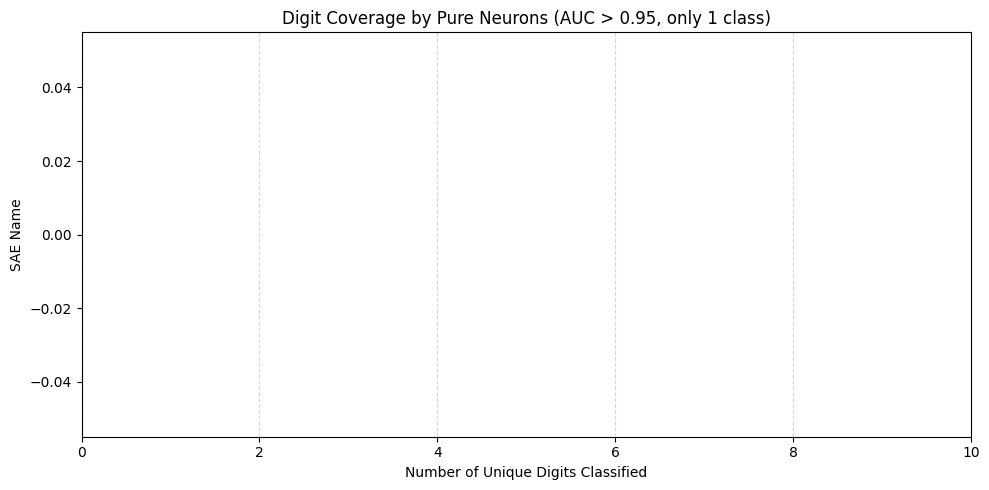

In [5]:
import pickle

with open("../logs_test/initialized_sae.pkl", "rb") as f:
    all_results = pickle.load(f)

sae_digit_counts = {}

for sae_name, results in all_results.items():

    if not sae_name.startswith('vanilla_sae'):
        continue
    
    auc_matrix = results["auc_matrix"]
    neuron_df = results["per_neuron_df"]

    count_per_neuron = (auc_matrix > 0.95).sum(axis=1)

    pure_neurons = count_per_neuron[count_per_neuron == 1].index

    digits_represented = neuron_df.loc[pure_neurons, "best_digit"]

    if digits_represented.nunique() >= 2:
        grouped_name = sae_name.split("_best")[0]
        sae_digit_counts[grouped_name] = digits_represented.nunique()

plt.figure(figsize=(10, 5))
plt.barh(list(sae_digit_counts.keys()), list(sae_digit_counts.values()), color="mediumseagreen", height=0.6)
plt.xlabel("Number of Unique Digits Classified")
plt.ylabel("SAE Name")
plt.title(f"Digit Coverage by Pure Neurons (AUC > 0.95, only 1 class)")
plt.xlim(0, 10)
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.subplots_adjust(left=0.2)  
plt.tight_layout()
plt.show()

In [5]:
all_results.keys()

dict_keys(['reanim_topk_sae_256_25_best_loss', 'reanim_topk_sae_256_25_best_both', 'reanim_topk_sae_256_25_best_dead10', 'topk_sae_256_5_best_loss', 'topk_sae_256_5_best_both', 'topk_sae_256_5_best_dead10', 'reanim_topk_sae_512_25_best_loss', 'reanim_topk_sae_512_25_best_both', 'reanim_topk_sae_512_25_best_dead10', 'topk_sae_512_384_best_loss', 'topk_sae_512_384_best_both', 'topk_sae_512_384_best_dead10', 'reanim_vanilla_sae_256_1_best_loss', 'reanim_vanilla_sae_256_1_best_both', 'reanim_vanilla_sae_256_1_best_dead10', 'reanim_vanilla_sae_256_0_best_loss', 'reanim_vanilla_sae_256_0_best_both', 'reanim_vanilla_sae_256_0_best_dead10', 'reanim_topk_sae_512_256_best_loss', 'reanim_topk_sae_512_256_best_both', 'reanim_topk_sae_512_256_best_dead11', 'vanilla_sae_256_3_best_loss', 'vanilla_sae_256_3_best_both', 'vanilla_sae_256_3_best_dead10', 'topk_sae_256_128_best_loss', 'topk_sae_256_128_best_both', 'topk_sae_256_128_best_dead10', 'topk_sae_256_51_best_loss', 'topk_sae_256_51_best_both', '

In [7]:
sae_digit_counts = {}
auc_matrix = all_results['reanim_vanilla_sae_512_1_best_loss']['auc_matrix']
neuron_df = all_results['reanim_vanilla_sae_512_1_best_loss']['per_neuron_df']
summary_df = all_results['reanim_vanilla_sae_512_1_best_loss']['sae_summary']


In [22]:
auc_matrix[(auc_matrix > 0.99).sum(axis=1) == 1]

digit,0,1,2,3,4,5,6,7,8,9
neuron_idx,,,,,,,,,,
26,0.401400,0.536444,0.438508,0.650071,0.544228,0.659291,0.996962,0.705615,0.652570,0.704578
87,0.995789,0.676491,0.627509,0.856692,0.590083,0.846534,0.689607,0.431025,0.452051,0.602598
106,0.524424,0.367404,0.677354,0.698036,0.462012,0.454480,0.997837,0.812481,0.516968,0.828838
155,0.828746,0.707402,0.643444,0.726661,0.476200,0.593646,0.990157,0.787508,0.652365,0.780943
245,0.469475,0.605238,0.648989,0.657042,0.990367,0.625733,0.647799,0.502739,0.652552,0.463140
254,0.572207,0.991850,0.728557,0.933389,0.810942,0.822980,0.598358,0.561820,0.504194,0.521177
284,0.583801,0.995052,0.511501,0.648056,0.596309,0.822709,0.795392,0.728699,0.621800,0.669000
418,0.568096,0.742952,0.619330,0.649922,0.517172,0.516915,0.994046,0.759664,0.602295,0.755611
461,0.919995,0.990193,0.579078,0.633192,0.773423,0.676223,0.680551,0.593774,0.682128,0.580373


/tmp/ipykernel_3372605/587345462.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load('log_06_10/test_activation.pt')
/tmp/ipykernel_3372605/587345462.py:6:

In [11]:
ckpt = torch.load('log_06_10/new_test_activation.pt')

fc1 = ckpt["fc1"]
labels = ckpt["labels"]

ckpt_train = torch.load('log_06_10/train_activation.pt')

fc1_train = ckpt_train["fc1"]
labels_train = ckpt_train["labels"]

sae = torch.load('logs_test/reanim_vanilla_sae_512_1/best_loss.pth')
device = torch.device("cuda")
sae.to(device)
sae.eval()

with torch.no_grad():
    pre_codes_train, codes_train = sae.encode(fc1_train.to(device))
    activations_train = codes_train.cpu()

    pre_codes, codes = sae.encode(fc1.to(device))
    activations = codes.cpu()

    results_df = evaluate_per_neuron_1vsall_test(activations_train, activations, labels_train.cpu(), labels.cpu())


auc_test_matrix = results_df.pivot(index='neuron_idx', columns='digit', values='auc_test').fillna(0)
auc_train_matrix = results_df.pivot(index='neuron_idx', columns='digit', values='auc_train').fillna(0)

/tmp/ipykernel_3416512/2946044980.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load('log_06_10/new_test_activation.pt')
/tmp/ipykernel_3416512/2946044980

In [10]:
fc1.shape

torch.Size([10000, 128])

In [12]:
auc_train_matrix[(auc_train_matrix > 0.95).sum(axis=1) == 1]

digit,0,1,2,3,4,5,6,7,8,9
neuron_idx,,,,,,,,,,
11,0.724195,0.521490,0.729304,0.585780,0.766392,0.729434,0.691620,0.974059,0.761303,0.588561
21,0.566522,0.433775,0.494638,0.675959,0.532389,0.720831,0.720580,0.955547,0.535722,0.683931
23,0.434530,0.815377,0.607963,0.659020,0.745027,0.653894,0.781547,0.857918,0.605013,0.968502
32,0.980501,0.470281,0.431496,0.727985,0.641466,0.656493,0.736354,0.606880,0.720773,0.747770
33,0.606084,0.492114,0.579669,0.501165,0.815909,0.670059,0.967881,0.663371,0.590118,0.746754
...,...,...,...,...,...,...,...,...,...,...
487,0.566448,0.669221,0.646163,0.530360,0.791465,0.962027,0.506668,0.725033,0.825827,0.664919
498,0.731248,0.730014,0.970025,0.504836,0.584685,0.696526,0.658162,0.612207,0.758777,0.678837
500,0.534121,0.785816,0.548889,0.585916,0.727008,0.689364,0.991427,0.850745,0.557181,0.861950


In [13]:
auc_test_matrix[(auc_test_matrix > 0.95).sum(axis=1) == 1]

digit,0,1,2,3,4,5,6,7,8,9
neuron_idx,,,,,,,,,,
11,0.728827,0.543083,0.743449,0.603207,0.779193,0.725740,0.645149,0.976195,0.766415,0.567084
16,0.647894,0.509660,0.956481,0.802988,0.857450,0.749111,0.615616,0.635426,0.760842,0.825624
21,0.568344,0.438283,0.486256,0.676846,0.531624,0.715413,0.714942,0.962865,0.551981,0.669930
23,0.431027,0.818350,0.633179,0.675383,0.753859,0.662758,0.753025,0.852571,0.592816,0.968326
30,0.573772,0.793086,0.496090,0.705850,0.547432,0.953536,0.862997,0.567707,0.782976,0.531716
...,...,...,...,...,...,...,...,...,...,...
487,0.583088,0.676297,0.665059,0.511726,0.787707,0.966194,0.527880,0.707038,0.820778,0.644842
498,0.724952,0.718191,0.967928,0.498383,0.566675,0.715021,0.685569,0.592429,0.775303,0.690749
500,0.528435,0.785877,0.556453,0.574093,0.725407,0.710217,0.989993,0.857001,0.548552,0.862432
